In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

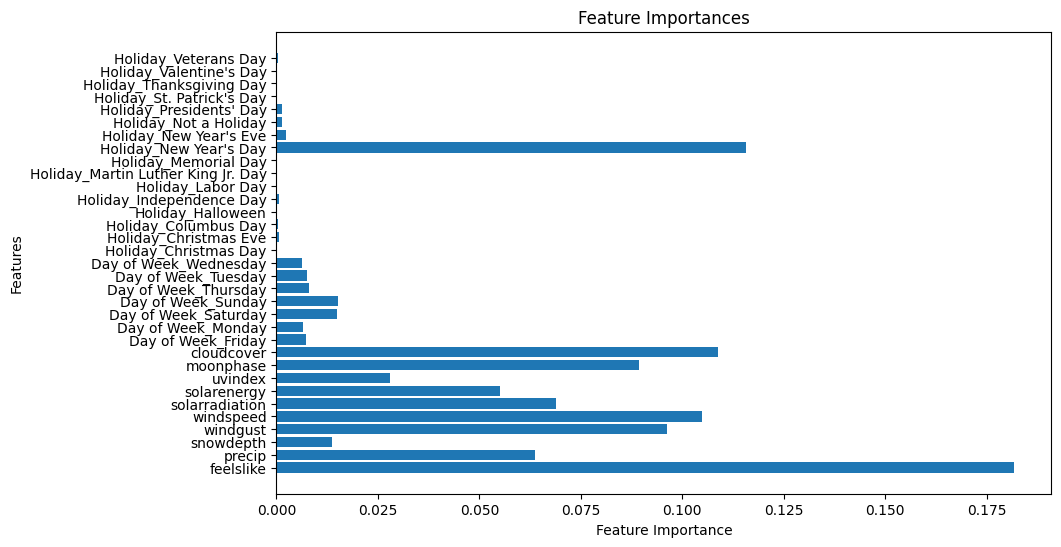

In [2]:


master_df = pd.read_csv('master.csv')
# Assuming master_df contains your data and 'Date' is a datetime column
data = master_df.copy()

# Drop unnecessary columns and missing values if needed
# data.dropna(inplace=True)  # Uncomment this line if you have missing values and want to drop them

# Split data into features (X) and target variable (y)
X = data[['Day of Week', 'feelslike', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=1000,min_samples_split=20,min_samples_leaf=1, max_depth=30 ,random_state=100)
rf.fit(X_train, y_train)

# Get predicted counts
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50,100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create the Random Forest Regressor model
# rf_model = RandomForestRegressor(random_state=42)

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)

# # Alternatively, you can use Randomized Search
# # Define the parameter distributions for Randomized Search
# param_dist = {
#     'n_estimators': [1000, 1250, 1500],
#     'max_depth': [None] + list(range(25, 101, 5)),
#     'min_samples_split': [6,8,10],
#     'min_samples_leaf': [1],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Perform Randomized Search with cross-validation
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)


In [3]:
mse = mean_squared_error(y_test, y_pred)
mse

0.6278438410403709

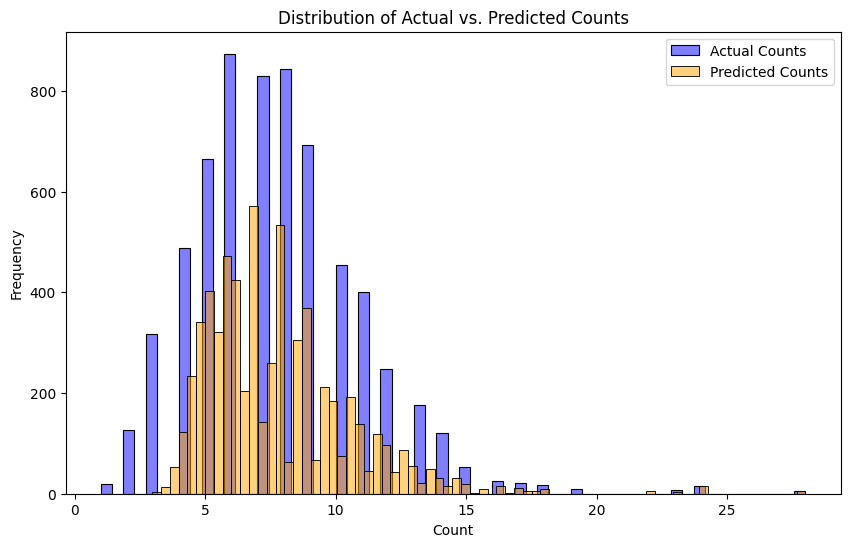

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

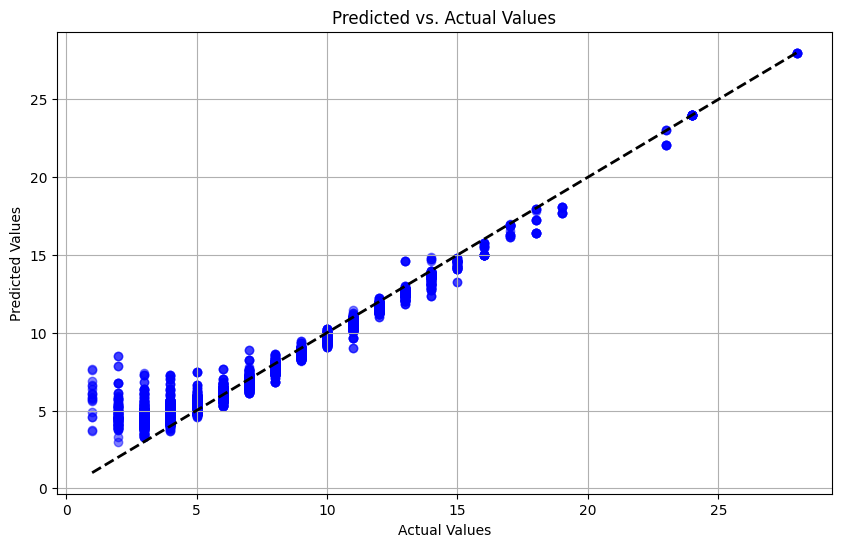

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

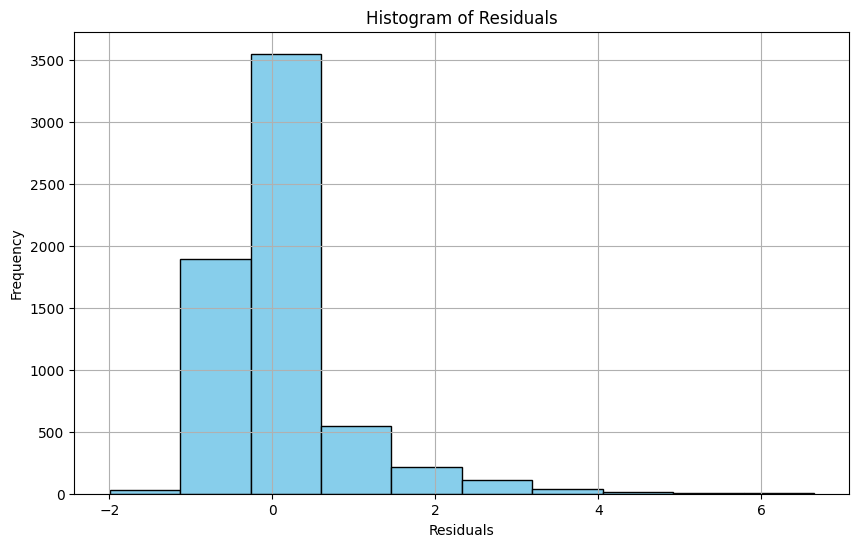

In [6]:
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
import shap
explainer = shap.TreeExplainer(rf)


c:\Users\kylie\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
shap_values = explainer.shap_values(X_test.head(100))

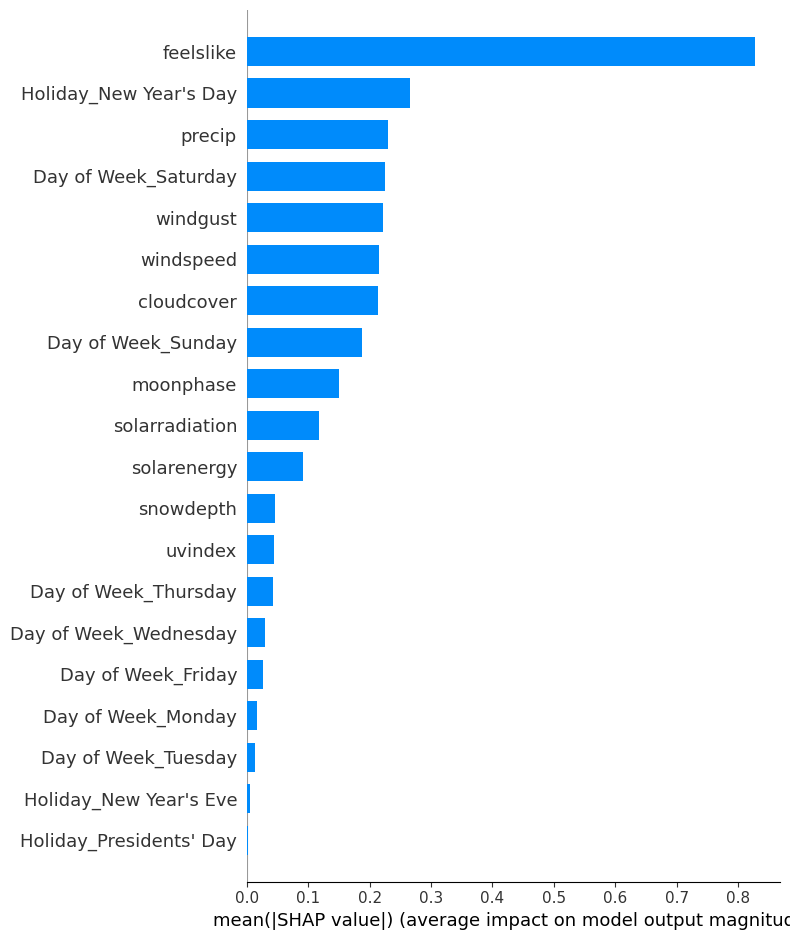

In [6]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

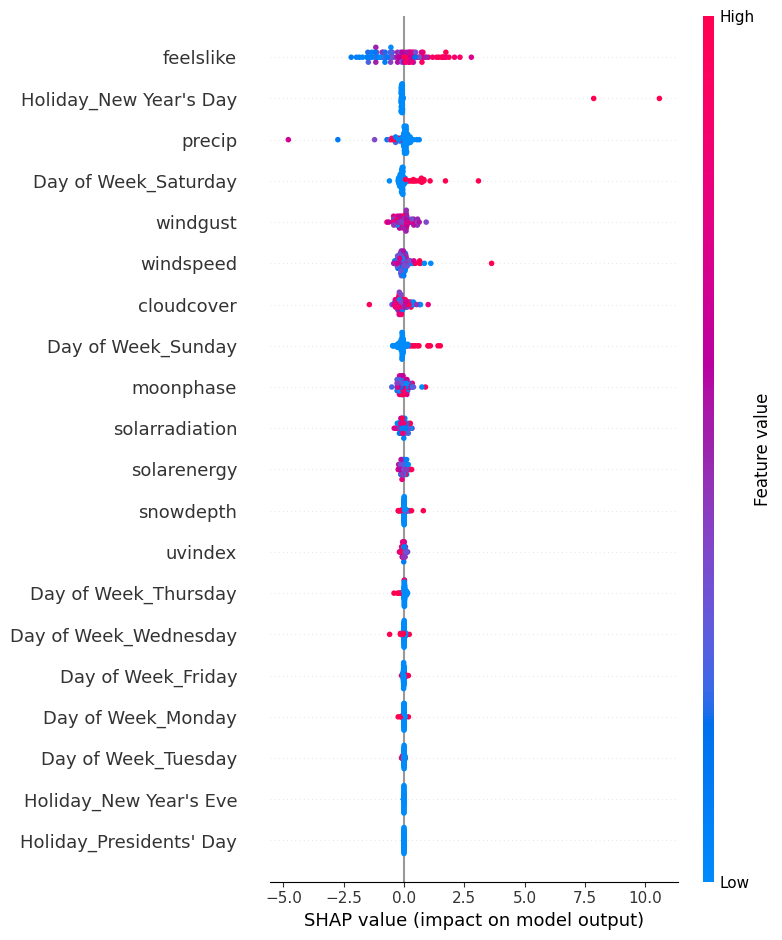

In [8]:
shap.summary_plot(shap_values, X_test.head(100), plot_type='dot')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import numpy as np

# Fit Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Get feature names
feature_names = X_train.columns

# Plot original coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), lasso_model.coef_, marker='o', linestyle='None', color='b', label='Original Coefficients')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Original Coefficients of Lasso Regression')
plt.legend()
plt.tight_layout()
plt.show()
